# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 27, 2023 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has cancer or not. It is important to catch this disease early to reduce mortality rate; late diagnosis will result in metastasis to other organs, which adversely impacts patient's prognosis. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|         | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 48 | 32 |
| **Actual no disease**       | 20 | 100 |


- Model B

|        | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 43 | 22 |
| **Actual no disease**       | 35 | 100 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

The class that is likely to serve as the "positive" class could be the disease class. The "positive" class can be thought of as the class we wish the model to detect. In cases of predicting health conditions, the disease present class is often chosen as the "positive" class.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = (100 + 48) / (100 + 48 + 32 + 20)
results_dict["B"]["accuracy"] = (100 + 43) / (100 + 43 + 22 + 35)

<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

In [4]:
print(results_dict["A"]["accuracy"])
print(results_dict["B"]["accuracy"])

0.74
0.715


Solely based on the accuracy scores above, model A has a higher calculated accuracy for our predictions and thus would be considered the better model. This does not take into account that since a late diagnosis is more costly to our situation, we would likely select the model which predicts accurately while minimizing the amount of false positives (predicting no disease when there really is disease). In this case, we would select Model B as it has a smaller rate of false positives than model A. 

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [5]:
results_dict["A"]["precision"] = (48)/(48+20)
results_dict["B"]["precision"] = (43)/(43+35)
results_dict["A"]["recall"] = (48)/(48+32)
results_dict["B"]["recall"] = (43)/(43+22)
results_dict["A"]["f1"] = (2)*((results_dict["A"]["precision"] * results_dict["A"]["recall"])/(results_dict["A"]["precision"] + results_dict["A"]["recall"]))
results_dict["B"]["f1"] = (2)*((results_dict["B"]["precision"] * results_dict["B"]["recall"])/(results_dict["B"]["precision"] + results_dict["B"]["recall"]))

Show the dataframe with all results. 

In [6]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.740000,0.715000
precision,0.705882,0.551282
recall,0.600000,0.661538
f1,0.648649,0.601399


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Given the type of problem (early cancer diagnosis), which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1. Given that we want to reduce late cancer diagnosis, we should reduce the rate of false negative errors. This would mean that recall is more informative as is it directly depends on the rate of false negatives, with higher recall indicating a reduced rate of false negatives and vice versa. 

2. Model B in this case would be considered the better model as it has a higher recall score than model A, indicating that model B produces less false negative errors than model A, allowing us to optimize for early cancer diagnosis. 

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

1. Credit card fraud detection dataset. Accuracy metric misleading due to extremely imbalanced classes. Minimizing recall would be the better strategy to ensure as many positive cases as positive are caught. https://www.kaggle.com/mlg-ulb/creditcardfraud.

2. Breast Cancer detection dataset. Moderate class imbalance makes accuracy metric misleading. Minimizing precision to reduce false positive errors and consequently unecessary invasive treatment would be the better strategy. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

3. Adult Census Income Dataset. Although minimal class imbalance, the real life cost of predicting false positive or false negative errors is not equal. In this case, optimizing either precision or recall would be a better strategy. https://archive.ics.uci.edu/ml/datasets/Adult

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [7]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [8]:
# count the number of True and False values in 'col1'
counts = train_df['churn'].value_counts()

# print the counts
print(counts)

False    1984
True      349
Name: churn, dtype: int64


Based on the information from value_counts(), we can see that there is a large class imbalance in favor of false in the target values. In some cases, as long as the model performance during prediction is acceptable, we can ignore this class imbalance. However in this case, we should deal with the class imbalance as the minority class "true" is of particular interest when it comes to prediction as we want to accurately determine how many customers have left or stayed in the subscription. This means that we should perform some sort of processing to deal with the imbalance, for example weighting or changing the data counts directly. 

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

<br><br>

### 2.3 Column transformer 
rubric={points:14}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

For each group of features (e.g. numeric, categorical or else) explain why you are applying the particular transformation. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

Finally, fit `ColumnTransformer` on your training set; and use the `ColumnTransformer` to transform your train data.

In [9]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 1402 to 1346
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2333 non-null   object 
 1   account length          2333 non-null   int64  
 2   area code               2333 non-null   int64  
 3   phone number            2333 non-null   object 
 4   international plan      2333 non-null   object 
 5   voice mail plan         2333 non-null   object 
 6   number vmail messages   2333 non-null   int64  
 7   total day minutes       2333 non-null   float64
 8   total day calls         2333 non-null   int64  
 9   total day charge        2333 non-null   float64
 10  total eve minutes       2333 non-null   float64
 11  total eve calls         2333 non-null   int64  
 12  total eve charge        2333 non-null   float64
 13  total night minutes     2333 non-null   float64
 14  total night calls       2333 non-null

Transformations:

Categorical:

State: OHE

International Plan: OHE

Voice mail plan: OHE

Churn: OHE

area code: OHE




Numeric:

Account Length: scale

phone number: ? drop

number vmail messages: scale

total day minutes/calls/charge: scale

total eve minutes/calls/charge: scale

total night minutes/calls/charge: scale

total intl minutues/calls/charge: scale

customer service calls: scale


I will be applying standard scaling to the numeric features because this allows the model to optimize without data points being too far or close together, while also preventing getting caught in local minimas.
The numeric features are 'account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                    'total intl calls', 'total intl charge', 'customer service calls'. 

I will be applying OHE to categorical features as this converts data into numerical format. 'state', 'area code', 'international plan', 'voice mail plan'  


In [11]:
numeric_features = ["account length", "number vmail messages", "total day calls","total day minutes", "total day charge", "total eve calls","total eve minutes", "total eve charge", "total night calls","total night minutes", "total night charge","total intl calls","total intl minutes", "total intl charge", "customer service calls"]
categorical_features = ["state", "international plan", "voice mail plan", "area code"]
drop_features = ["phone number"]

In [12]:
#from lecture 11

numeric_transformer = make_pipeline(StandardScaler())

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

In [13]:
X_transformed = preprocessor.fit_transform(X_train)


<br><br>

<br><br>

### 2.4 area code feature
rubric={points:4}

The original dataset had a feature called `area code`.

1. The area codes are numbers. Does it make sense to encode them as one-hot-endoded (OHE) or not? Please justify your response.
2. What were the possible values of `area code`? 
3. If area code is encoded with OHE, how many new features are created to replace it?

In [14]:
counts = train_df['area code'].value_counts()
print(counts)

415    1178
408     588
510     567
Name: area code, dtype: int64



1. Yes, OHE would be preferred in this case as area code is the direct numeric representation of different area codes. This would allow for the encoding to be reduced to smaller integers which is a more interpretable format and convenient in our case since there is only 3 possible area codes. 

2. What were the possible values of `area code`?  

    415, 408, 510


3. 
Only three new features would need to be created to replace the area code feature. 

<br><br>

### 2.5 Logistic regression
rubric={points:12} 

**Your tasks:**

1. Report the cross-validation results of a `LogisticRegression` model, with default Hparams, on the following metrics: `"accuracy", "precision", "recall", "f1"`
2. Are you satisfied with the results? Explain why or why not. Discuss in a few sentences. 

In [15]:
#from chapter 9
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]
pipe_lr = make_pipeline(preprocessor, LogisticRegression())

scores = cross_validate(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.116649,0.011915,0.867238,0.864416,0.367347,0.335958,0.257143,0.229391,0.642857,0.627451
1,0.047514,0.010458,0.854390,0.868703,0.291667,0.370180,0.200000,0.258065,0.538462,0.654545
2,0.047517,0.010524,0.850107,0.868167,0.255319,0.372449,0.171429,0.261649,0.500000,0.646018
3,0.061519,0.010501,0.869099,0.866095,0.371134,0.362245,0.260870,0.253571,0.642857,0.633929
4,0.043181,0.010450,0.836910,0.869845,0.240000,0.378517,0.171429,0.265233,0.400000,0.660714


2. No. Although fitting and scoring times are not unreasonable and there should be very little overfitting occurring. Precision is relatively low meaning that of the predicted positive examples, many were false positive errors. Recall being low as well means that of all positive examples, only about 23-27% were correctly predicted in the training set, with a lower range present in the test set. Both these metrics are combined in an F1 score that is relatively low for both the training and test sets. These metrics suggest that our model is not preforming well in correctly predicting positive examples. 

### 2.6 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences while comparing the metrics of this model and the previous model.

In [16]:
#from chapter 9

pipe_lr_balanced = make_pipeline(preprocessor, LogisticRegression(max_iter = 1000, class_weight = 'balanced'))

scores_balanced = cross_validate(
    pipe_lr_balanced, X_train, y_train, return_train_score=True, scoring=scoring
)

pd.DataFrame(scores_balanced)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.100207,0.012560,0.785867,0.769025,0.489796,0.497083,0.685714,0.763441,0.380952,0.368512
1,0.045584,0.010819,0.770878,0.769025,0.492891,0.499419,0.742857,0.770609,0.368794,0.369416
2,0.062248,0.010662,0.764454,0.773848,0.455446,0.510441,0.657143,0.788530,0.348485,0.377358
3,0.049475,0.010198,0.751073,0.780932,0.462963,0.520516,0.724638,0.792857,0.340136,0.387435
4,0.055627,0.010628,0.731760,0.785753,0.434389,0.529412,0.685714,0.806452,0.317881,0.394046



2. Yes, the improved recall scores and associated f1 score increase suggest that addressing the class imbalance in the data was able to improve the predictive performance of our model. However, precision scores on both the test and training set decreased compared to the unbalanced Logistical Regression model. 

### 2.7 Hyperparameter optimization
rubric={points:10}

1. Jointly optimize `C` and `class_weight` with `GridSearchCV` and `scoring="f1"`.
  - For `class_weight`, consider 3 values: 
    - `None` (no weight)
    - "weight of class 0 = 1"  and  "weight of class 1 = 3"
    - '`balanced`'
  - For `C`, choose some reasonable values
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [17]:
param_grid = {
    'logisticregression__class_weight': [None, {0:1, 1:3}, 'balanced'], 
    'logisticregression__C': 10.0 ** np.arange(-2, 2, 0.5), #try with -2,2,0.5
}

pipe_lr_max_iter = make_pipeline(preprocessor, LogisticRegression(max_iter=10000))




In [18]:
grid_search = GridSearchCV(
    pipe_lr_max_iter, param_grid, cv=5, n_jobs=-1, return_train_score = True, scoring="f1"
)

grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
    

0.49175283989178376
{'logisticregression__C': 0.31622776601683794, 'logisticregression__class_weight': {0: 1, 1: 3}}


In [19]:
scores_grid = cross_validate(
    grid_search, X_train, y_train, return_train_score=True, scoring="f1"
)


pd.DataFrame(scores_grid)

,fit_time,score_time,test_score,train_score
0,4.391509,0.008161,0.468293,0.494279
1,4.635112,0.007869,0.504587,0.485682
2,6.755978,0.009566,0.428571,0.531108
3,7.353360,0.009740,0.478528,0.538226
4,6.117030,0.008415,0.453488,0.535604


In [20]:
results = pd.DataFrame(grid_search.cv_results_).set_index("rank_test_score").sort_index()
results.T


rank_test_score,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.097179,0.070871,0.118647,0.066362,0.198623,0.053042,0.194653,0.171127,0.089065,0.050443,...,0.140877,0.052962,0.212282,0.142777,0.256674,0.103056,0.07459,0.061612,0.045902,0.04962
std_fit_time,0.007954,0.008338,0.007888,0.006673,0.049162,0.00492,0.043774,0.016862,0.0055,0.007472,...,0.020544,0.00296,0.027958,0.018155,0.063815,0.010493,0.005428,0.004511,0.004301,0.003528
mean_score_time,0.015966,0.016685,0.015917,0.016425,0.018149,0.01545,0.016598,0.021347,0.014437,0.016678,...,0.019344,0.016737,0.016405,0.015094,0.018606,0.014536,0.015829,0.015712,0.013931,0.015911
std_score_time,0.001938,0.00369,0.002192,0.002537,0.003622,0.001122,0.001253,0.00374,0.002133,0.004385,...,0.005066,0.001923,0.001582,0.002776,0.003479,0.001767,0.003806,0.002268,0.002139,0.002125
param_logisticregression__C,0.316228,0.1,1.0,0.1,10.0,0.031623,31.622777,3.162278,0.316228,0.01,...,3.162278,0.01,10.0,3.162278,31.622777,1.0,0.316228,0.1,0.031623,0.01
param_logisticregression__class_weight,"{0: 1, 1: 3}","{0: 1, 1: 3}","{0: 1, 1: 3}",balanced,"{0: 1, 1: 3}",balanced,"{0: 1, 1: 3}","{0: 1, 1: 3}",balanced,balanced,...,balanced,"{0: 1, 1: 3}",None,None,None,None,None,None,None,None
params,"{'logisticregression__C': 0.31622776601683794,...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 1.0, 'logisticregres...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 10.0, 'logisticregre...","{'logisticregression__C': 0.03162277660168379,...","{'logisticregression__C': 31.622776601683793, ...","{'logisticregression__C': 3.1622776601683795, ...","{'logisticregression__C': 0.31622776601683794,...","{'logisticregression__C': 0.01, 'logisticregre...",...,"{'logisticregression__C': 3.1622776601683795, ...","{'logisticregression__C': 0.01, 'logisticregre...","{'logisticregression__C': 10.0, 'logisticregre...","{'logisticregression__C': 3.1622776601683795, ...","{'logisticregression__C': 31.622776601683793, ...","{'logisticregression__C': 1.0, 'logisticregres...","{'logisticregression__C': 0.31622776601683794,...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 0.03162277660168379,...","{'logisticregression__C': 0.01, 'logisticregre..."
split0_test_score,0.524823,0.546763,0.528571,0.49,0.521127,0.468293,0.521127,0.521127,0.484536,0.481132,...,0.479592,0.465116,0.36,0.36,0.36,0.367347,0.357895,0.361702,0.219512,0.054795
split1_test_score,0.559006,0.552147,0.54321,0.495327,0.559006,0.504587,0.559006,0.540881,0.497653,0.482143,...,0.488038,0.475524,0.306122,0.306122,0.30303,0.291667,0.270833,0.202247,0.141176,0.027397
split2_test_score,0.428571,0.422535,0.427673,0.478049,0.419753,0.468293,0.419753,0.42236,0.465347,0.465347,...,0.441176,0.403101,0.252632,0.252632,0.234043,0.255319,0.234043,0.26087,0.211765,0.106667


2. The two optimal hyper parameters found were C = 0.31622776601683794 and class_weight = {0: 1, 1: 3}. The best validation f1 score was 0.491753 on the test split.
<br><br>

### 2.8 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Plot Confusion matrix
    - Plot Precision-recall curve 
    - Calculate average precision score
    - Plot ROC curve
    - Report AUC score
3. Comment on the AUC score and give an intuitive explanation of what this value of AUC means for this problem.

In [21]:
#code adapted from lecture 9
pipe = make_pipeline(preprocessor, LogisticRegression(C = 0.31622776601683794, class_weight = {0: 1, 1: 3}, max_iter = 1000))

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

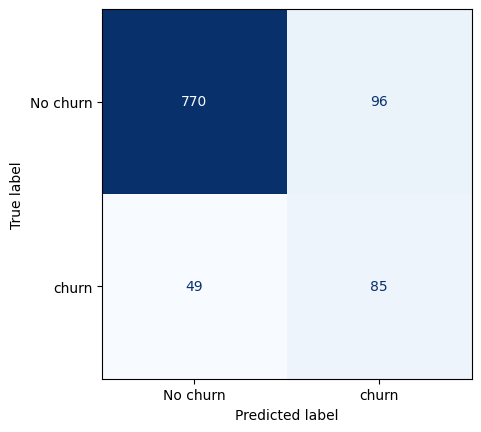

In [22]:
ConfusionMatrixDisplay.from_estimator(
    pipe,
    X_test,
    y_test,
    display_labels=["No churn", "churn"],
    values_format = "d",
    cmap = plt.cm.Blues,
    colorbar = False,
)

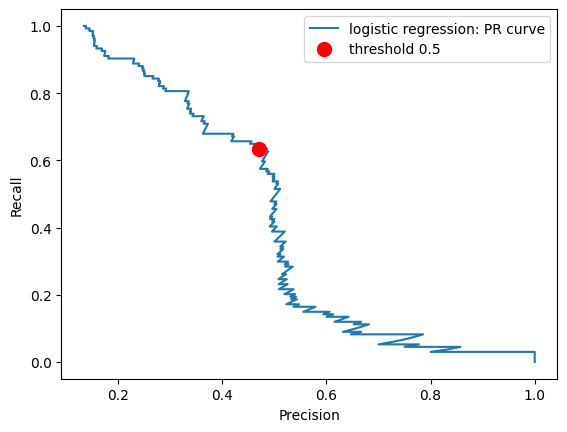

In [23]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, grid_search.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, grid_search.predict(X_test)),
    recall_score(y_test, grid_search.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");


In [24]:
from sklearn.metrics import average_precision_score

ap_lr = average_precision_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Average precision of logistic regression: {:.3f}".format(ap_lr))

Average precision of logistic regression: 0.467


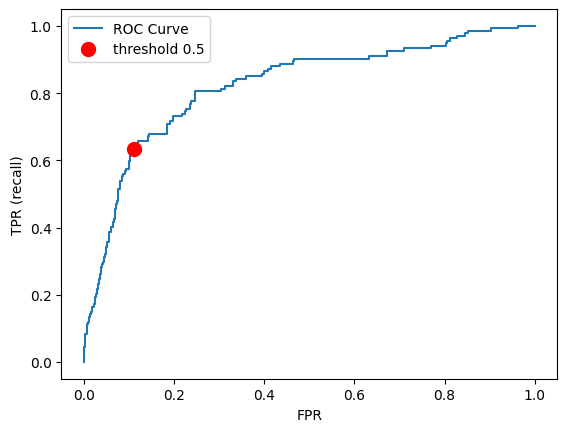

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

In [26]:
from sklearn.metrics import roc_auc_score

roc_lr = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("AUC for logistic regression: {:.3f}".format(roc_lr))

AUC for logistic regression: 0.823


An AUC score of 0.826 means that the model ranks 82.6% of positive examples higher than 82.6% of negative examples across the thresholds on average.

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [27]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (75%) and test (25%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` to train and test splits. 

In [28]:
train_df, test_df = train_test_split(housing_df, test_size = 0.25, random_state = 123)

In [29]:
X_train = train_df.drop(columns = ['MedHouseVal'])
y_train = train_df["MedHouseVal"]

X_test = test_df.drop(columns = ['MedHouseVal'])
y_test = test_df["MedHouseVal"]                        

In [30]:
train_df.info()
train_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 19995 to 19966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       15480 non-null  float64
 1   HouseAge     15480 non-null  float64
 2   AveRooms     15480 non-null  float64
 3   AveBedrms    15480 non-null  float64
 4   Population   15480 non-null  float64
 5   AveOccup     15480 non-null  float64
 6   Latitude     15480 non-null  float64
 7   Longitude    15480 non-null  float64
 8   MedHouseVal  15480 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19995,1.0349,6.0,4.165217,0.982609,734.0,3.191304,36.19,-119.35,0.678
17889,4.7625,13.0,5.265207,1.002433,1087.0,2.644769,37.41,-121.95,1.375
1977,3.5192,9.0,8.747475,1.845118,796.0,2.680135,38.61,-120.44,0.980
6861,2.8672,30.0,4.635616,1.090411,1130.0,3.095890,34.06,-118.13,1.985
11247,4.1276,13.0,4.429936,0.963376,1749.0,2.785032,33.81,-118.00,1.538
...,...,...,...,...,...,...,...,...,...
7763,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,1.676
15377,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,1.809
17730,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,2.862
15725,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,4.125


In [31]:
numeric_feats = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]  
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feats)
)

Since all categories are numeric, and none have any missing values. The only transformations that need to occur are to use standard scaling.<br><br>

### 3.2 Baseline: Linear Regression 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `sklearn.linear_model.LinearRegression` with default scoring. 
2. What metric is used for scoring by default? 

In [32]:
pipe_lreg = make_pipeline(preprocessor, Ridge())

scores = cross_validate(
    pipe_lreg, X_train, y_train, return_train_score = True
)

pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.019126,0.017990,0.608633,0.603297
1,0.011755,0.004584,0.599232,0.607080
2,0.011407,0.004834,0.616812,0.602606
3,0.010778,0.004654,0.592940,0.607928
4,0.010483,0.004706,0.014994,0.612855


2. R^2 score is used by default

<br><br>

### 3.3 Random Forest Regressor
rubric={points:7}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for two model (`models`) and five evaluation metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [33]:
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "neg_mean_absolute_percentage_error": "neg_mean_absolute_percentage_error",
}

In [34]:
for model in models:
    pipe = make_pipeline(StandardScaler(), models[model])
    print(f"Scores for {model} model.")
    display(pd.DataFrame(
        cross_validate(
            pipe,
            X_train,
            y_train,
            return_train_score = True,
            scoring = score_types_reg
        )
    ))

Scores for Ridge model.


,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.030982,0.005196,-0.549963,-0.523218,-0.741595,-0.723338,-0.539838,-0.529527,0.608633,0.603297,-0.321621,-0.315332
1,0.009039,0.004844,-0.539582,-0.524089,-0.734563,-0.723940,-0.544145,-0.530660,0.599232,0.607080,-0.319187,-0.317532
2,0.008528,0.004808,-0.509989,-0.531546,-0.714135,-0.729072,-0.522755,-0.536714,0.616812,0.602606,-0.313360,-0.319989
3,0.009254,0.004604,-0.538532,-0.525259,-0.733847,-0.724748,-0.536827,-0.532926,0.592940,0.607928,-0.322003,-0.316455
4,0.008280,0.004672,-1.255748,-0.523310,-1.120602,-0.723402,-0.536979,-0.529657,0.014994,0.612855,-0.320155,-0.315432


Scores for Random Forest model.


,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,8.934340,0.109862,-0.259727,-0.038768,-0.509635,-0.196896,-0.338179,-0.128448,0.815172,0.970606,-0.195939,-0.072587
1,10.426715,0.667034,-0.274622,-0.036808,-0.524044,-0.191854,-0.340094,-0.124497,0.796028,0.972404,-0.184758,-0.070853
2,13.168864,0.325339,-0.254571,-0.037848,-0.504550,-0.194546,-0.331196,-0.127234,0.808724,0.971704,-0.187935,-0.071748
3,12.407315,0.162041,-0.286175,-0.036967,-0.534953,-0.192269,-0.348132,-0.125647,0.783689,0.972406,-0.196815,-0.070603
4,8.863842,0.101884,-0.273399,-0.037188,-0.522876,-0.192843,-0.339102,-0.125736,0.785546,0.972488,-0.193769,-0.071030


3.  The Ridge model performs similar to baseline while the Random Forest model performs better as seen with the lower mean squared error scores compared to both the baseline and ridge model.
<br><br>

### 3.4 Hyperparameter optimization 
rubric={points:1}

1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose `neg_mean_absolute_percentage_error` as the HParam optimization metric.

2. What was the best `alpha` hyper-parameter found?

In [35]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [36]:
pipe_ridge = make_pipeline(preprocessor, Ridge())

random_search = RandomizedSearchCV(
    pipe_ridge, param_dist, cv = 5, n_jobs=-1, return_train_score = True, scoring = "neg_mean_absolute_percentage_error"
)

random_search.fit(X_train, y_train)
print("2. The best hyper-parameter value found was:" )
print(random_search.best_params_)

2. The best hyper-parameter value found was:
{'ridge__alpha': 50.430675996731686}



<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

Test the best model (from 3.4) on the test set based on the `neg_mean_absolute_percentage_error` score.

In [37]:
score = random_search.score(X_test, y_test)
print(score)

-0.3162060097627598


<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Explore coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: 
   - features 
   - coefficients
2. Increasing which feature values would result in higher housing price? 

In [38]:
ridge_tuned = make_pipeline(preprocessor, Ridge(alpha=49.33124076676083))
ridge_tuned.fit(X_train, y_train)
ridge_preds = ridge_tuned.predict(X_test)
ridge_preds[:10]

df = pd.DataFrame(
    data={
        "features": X_train.columns,
        "coefficients": ridge_tuned.named_steps["ridge"].coef_,
    }
)

df.sort_values("coefficients",ascending=False)

,features,coefficients
0,MedInc,0.833012
3,AveBedrms,0.301027
1,HouseAge,0.121811
4,Population,-0.001771
5,AveOccup,-0.042208
2,AveRooms,-0.266187
7,Longitude,-0.825614
6,Latitude,-0.856426


2. Increasing these features would result in higher housing prices. MedInc, AveBedrms, HouseAge 
<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 